https://cienciadedatos.net/documentos/py49-modelling-time-series-trend-with-tree-based-models.html#Libraries

https://cienciadedatos.net/documentos/py44-multi-series-forecasting-skforecast.html

In [1]:
# Data manipulation
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')

# Modelling and Forecasting
# ==============================================================================
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.preprocessing import TimeSeriesDifferentiator
from sklearn.metrics import mean_absolute_error

c:\Users\altap\anaconda3\envs\TFM\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Libraries
# ======================================================================================
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
from statsmodels.graphics.tsaplots import plot_acf

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import  HistGradientBoostingRegressor
from lightgbm import LGBMRegressor

from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import backtesting_forecaster
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries

# Read data

In [20]:
data = pd.read_csv('C:\\Users\\altap\\OneDrive\\Escritorio\TFM\\Forecasting_FinancialTS\\data\\preparation\\df_no24.csv')

In [28]:
data = data.drop('Unnamed: 0', axis=1)


In [46]:
# Convertir la columna 'date' a datetime
data['date'] = pd.to_datetime(data['date'])

# Establecer la columna 'date' como el índice
data.set_index('date', inplace=True)

# Establecer la frecuencia del índice a diario ('D')
data.index = data.index.to_period('D')

In [29]:
# Split data into train-validation-test
# ======================================================================================
end_train = '2019-01-01'
end_val = '2022-01-01'

data_train = data.loc[:end_train, :].copy()
data_val   = data.loc[end_train:end_val, :].copy()
data_test  = data.loc[end_val:, :].copy()

print(f"Train dates      : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}  (n={len(data_val)})")
print(f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Train dates      : 0 --- 2019  (n=2020)
Validation dates : 2020 --- 2022  (n=3)
Test dates       : 2023 --- 2484  (n=462)


# Univariant analysis

In [ ]:
# 

C:\Users\altap\AppData\Local\Temp\ipykernel_11844\1720493949.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.iloc[:, :8].plot(


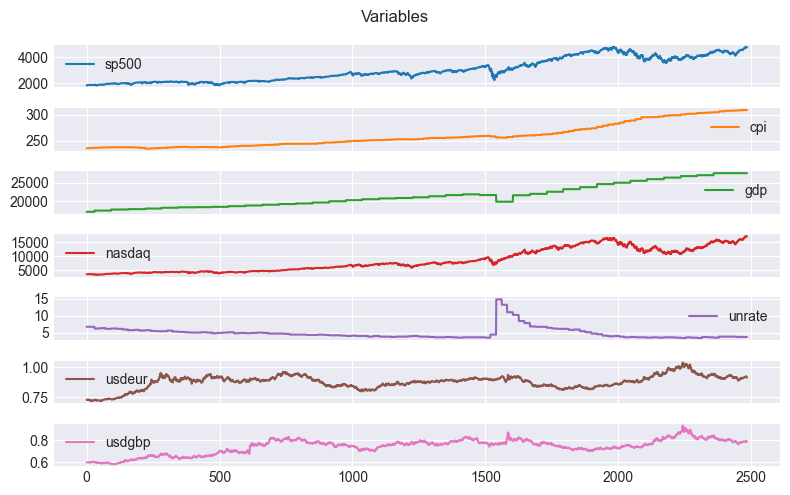

In [32]:
# Plot time series
# ======================================================================================
fig, ax = plt.subplots(figsize=(8, 5))
data.iloc[:, :8].plot(
    legend   = True,
    subplots = True, 
    sharex   = True,
    title    = 'Variables',
    ax       = ax, 
)
fig.tight_layout();

In [36]:
data.isna().sum()

date      0
sp500     0
cpi       0
gdp       0
nasdaq    0
unrate    0
usdeur    0
usdgbp    0
dtype: int64

IndexError: index 4 is out of bounds for axis 0 with size 4

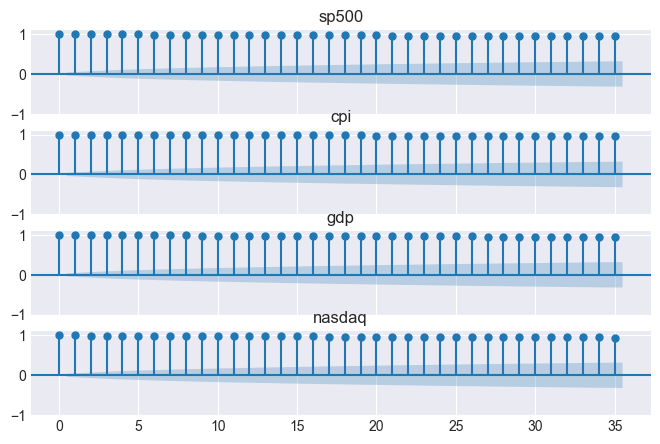

In [34]:
# Autocorrelation plot
# ======================================================================================
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 5), sharex=True)
axes = axes.flat
for i, col in enumerate(data.columns[1:8]):
    plot_acf(data[col], ax=axes[i], lags=7*5)
    axes[i].set_ylim(-1, 1.1)
    axes[i].set_title(f'{col}')
fig.tight_layout()
plt.show()

# GradientBoosting methods
https://cienciadedatos.net/documentos/py39-forecasting-time-series-with-skforecast-xgboost-lightgbm-catboost

In [42]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd
from astral.sun import sun
from astral import LocationInfo
from skforecast.datasets import fetch_dataset

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as poff
pio.templates.default = "seaborn"
poff.init_notebook_mode(connected=True)
plt.style.use('seaborn-v0_8-darkgrid')

# Modelling and Forecasting
# ==============================================================================
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector

from skforecast.ForecasterBaseline import ForecasterEquivalentDate
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import bayesian_search_forecaster
from skforecast.model_selection import backtesting_forecaster
#import shap
#shap.initjs()

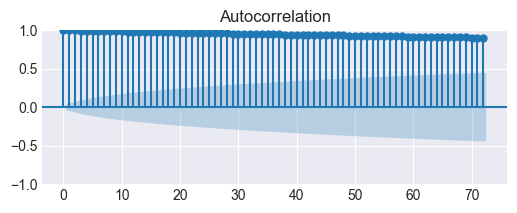

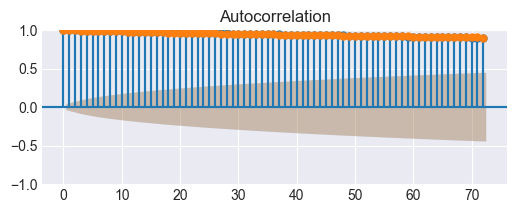

In [40]:
# Autocorrelation plot
# ==============================================================================
fig, ax = plt.subplots(figsize=(6, 2))
plot_acf(data['nasdaq'], ax=ax, lags=72)
plt.show()

plot_acf(data['sp500'], ax=ax, lags=72)


## Baseline model

In [49]:
data.index.freq

<Day>

In [52]:
# Create baseline: value of the same hour of the previous day
# ==============================================================================
forecaster = ForecasterEquivalentDate(
                 offset    = 5,
                 n_offsets = 1
             )

# Train forecaster
# ==============================================================================
forecaster.fit(y=data.loc[:end_val, 'sp500'])
forecaster


c:\Users\altap\anaconda3\envs\TFM\lib\site-packages\skforecast\utils\utils.py:815: UserWarning:

`y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.



ForecasterEquivalentDate 
Offset: 5 
Number of offsets: 1 
Aggregation function: mean 
Window size: 5 
Training range: [0, 1983] 
Training index type: RangeIndex 
Training index frequency: 1 
Creation date: 2024-03-26 23:20:23 
Last fit date: 2024-03-26 23:20:23 
Skforecast version: 0.11.0 
Python version: 3.10.14 
Forecaster id: None 

In [53]:
# Backtesting
# ==============================================================================
metric_baseline, predictions = backtesting_forecaster(
                                   forecaster         = forecaster,
                                   y                  = data['sp500'],
                                   steps              = 36,
                                   metric             = 'mean_absolute_error',
                                   initial_train_size = len(data.loc[:end_val]),
                                   refit              = False,
                                   n_jobs             = 'auto',
                                   verbose            = False,
                                   show_progress      = True
                               )

print(f"Backtest error (MAE): {metric_baseline}")

c:\Users\altap\anaconda3\envs\TFM\lib\site-packages\skforecast\utils\utils.py:815: UserWarning:

`y` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.

  0%|          | 0/14 [00:00<?, ?it/s]c:\Users\altap\anaconda3\envs\TFM\lib\site-packages\skforecast\utils\utils.py:877: UserWarning:

`last_window` has no DatetimeIndex nor RangeIndex index. Index is overwritten with a RangeIndex.

100%|██████████| 14/14 [00:00<00:00, 967.82it/s]


KeyError: "None of [Index([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14,\n       ...\n       28, 29, 30, 31, 32, 33, 34, 35, 36, 37],\n      dtype='int64', length=501)] are in the [index]"